<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Graphs and Matrices 1: Adjacency Matrices


## Table of contents

- [Adjacency Matrices](#Paths)
- [Enumeration of words](#words)
- [Transition Matrices and Absorption probabilities](#Escape)
- [Bonus: The target](#Target)


In [11]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()


In [12]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy             # package for symbolic computation
from sympy import *


<a id="Paths"></a>
# Adjacency Matrices

### Exercise 1. Warm-up
Let $G$ be the following graph:
<img src="figures/GrapheBasique.jpg" style="width: 200px;"/>


<div markdown=1 class="DoIt"> 

Use the adjacency matrix of $G$ to compute the number of paths of length $20$ from $d$ to $c$ in $G$.

In [13]:
# 矩阵乘自身多次相乘的function
def matrixPow(Matrix,n):
    if(type(Matrix)==list):
        Matrix=np.array(Matrix)
    if(n==1):
        return Matrix
    else:
        return np.matmul(Matrix,matrixPow(Matrix,n-1))

In [14]:
# Answer
G = [[0, 1, 0, 0], 
    [1, 0, 1, 1], 
    [1, 0, 0, 0], 
    [1, 0, 0, 0]]


G_20 = matrixPow(G, 20)
print(G_20)
print('The number of paths of leng 20 from d to c is ', G_20[3][2])

[[1713 1138  737  737]
 [2612 1713 1138 1138]
 [1138  737  488  488]
 [1138  737  488  488]]
The number of paths of leng 20 from d to c is  488


<div markdown=1 class="Answers"> <i>Solution + explanation here</i>

Here we express the Graph $G$ in the matrix and compute $G^{20}$ with numpy. Then from the new matrix we can find the result from $d$ to $c$.



<a id="words"></a>
##  Enumeration of words

### Exercise 2. $b$ never followed by $c$

<div markdown=1 class="DoIt"> We consider words with letters $a,b,c$. Let $M_n$ be the number of words of length $n$ (the length of a word is the number of letters) such that a $b$ is never immediately followed by a  $c$.

For example $M_2=8$:
$$
aa,\ ab,\ ac,\ ba,\ bb,\ ca,\ cb,\ cc.
$$

Write a script which computes $M_1,M_2,\dots,M_{20}$ using a graph and its adjacency matrix. You can consider the following graph:
<br><br>
<center>
<img src="figures/Graphe_abc.jpg" style="width: 200px;"/></center>
<br>


In [15]:
G1 = np.matrix([[1, 1, 1],
                [1, 1, 0],
                [1, 1, 1]])

# 计算矩阵内所有数字之和
def matrix_sum(G):
    num = 0
    for i in range(len(G)):
        for j in range(len(G)):
            num += G[i][j]
    return num

List=[]
for n in range(1,21):
    Mat=G1**(n-1)
    List.append(np.sum(Mat))
    print('Number of words of size n=',n,': ',np.sum(Mat))
        

Number of words of size n= 1 :  3
Number of words of size n= 2 :  8
Number of words of size n= 3 :  21
Number of words of size n= 4 :  55
Number of words of size n= 5 :  144
Number of words of size n= 6 :  377
Number of words of size n= 7 :  987
Number of words of size n= 8 :  2584
Number of words of size n= 9 :  6765
Number of words of size n= 10 :  17711
Number of words of size n= 11 :  46368
Number of words of size n= 12 :  121393
Number of words of size n= 13 :  317811
Number of words of size n= 14 :  832040
Number of words of size n= 15 :  2178309
Number of words of size n= 16 :  5702887
Number of words of size n= 17 :  14930352
Number of words of size n= 18 :  39088169
Number of words of size n= 19 :  102334155
Number of words of size n= 20 :  267914296


<div markdown=1 class="Answers"> 

**Question 1.** The number $S_n$ corresponds to the number of paths of length $n-1$ in the above graph ($n-1$ edges correspond to $n$ letters.)

For exemple, the word $abbbac$ (length $6$) corresponds to $a\to b\to b\to b\to a\to c$ (path of length $5$). 

Therefore $M_n$ is the sum of all coefficients in the matrix $A^{n-1}$, where
$$
A=
\begin{matrix}
a \\ b \\ c 
\end{matrix}
\begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 0 \\
1 & 1 & 1 \\
\end{pmatrix}.
$$


### Exercise 3.  $b$-short words
<div markdown=1 class="DoIt"> We say that a word $w$ with letters $a,b$ is $b$-<i>short</i> if there are never $4$ consecutive $b$'s in $w$. For instance,
$$
w_1=aa\color{green}{b}aaaaaa\color{green}{bbb}aaa\color{green}{b}aa
$$
is $b$-short while
$$
w_2=aa\color{green}{b}aa\color{green}{bb}a\color{red}{bbbbbb}aa\color{green}{bb}a
$$
is not. Let $S_n$ be the number of $b$-short words of length $n$.

Write a script which computes $S_1,S_2,\dots,S_{20}$ using a graph and its adjacency matrix.


<div markdown=1 class="Answers"> 

In order to solve this porblem, we denote $a$ and other three $b$ points in the graph which are $b_{1}, b_{2}, b_{3}$. Point $a$ to $b_{1}, b_{2}, b_{3}$ are connected and there is a path from $b_{1} \rightarrow b_{2} \rightarrow b_{3}$. Since we start either from $a$ or $b$, therefore we have $a \leftrightarrow  b$ and $b_{2} \rightarrow a, b_{3} \rightarrow a$. So we have the adjacency matrix of the graph
$$
A=
\begin{matrix}
a \\ b_1\\b_2\\b_3
\end{matrix}
\begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 0 & 1 & 0\\
1 & 0 & 0 & 1\\
1 & 0 & 0 & 0
\end{pmatrix}.
$$

For exemple, the word $abbbaa$ (length $6$) corresponds to $a \to b_1\to b_2 \to b_3 \to a \to a$ (path of length $5$). <br><i>(The vertices $b_3,b_1, b_2$ ensure that there are never $4$ consecutive $b$'s.)</i>

Therefore $S_n$ is the sum of all coefficients in the two first lines of matrix $A^{n-1}$.

In [16]:
G3 = np.matrix([[1,1,0,0], [1,0,1,0], [1,0,0,1], [1,0,0,0]])
print('The adjacency matrix is ')
print(G3)

result = []
for n in range(1, 21):
    mat = G3 ** (n-1)
    print('The S_n of the length '+str(n)+' is', np.sum(mat[0:2,]))
    

The adjacency matrix is 
[[1 1 0 0]
 [1 0 1 0]
 [1 0 0 1]
 [1 0 0 0]]
The S_n of the length 1 is 2
The S_n of the length 2 is 4
The S_n of the length 3 is 8
The S_n of the length 4 is 15
The S_n of the length 5 is 29
The S_n of the length 6 is 56
The S_n of the length 7 is 108
The S_n of the length 8 is 208
The S_n of the length 9 is 401
The S_n of the length 10 is 773
The S_n of the length 11 is 1490
The S_n of the length 12 is 2872
The S_n of the length 13 is 5536
The S_n of the length 14 is 10671
The S_n of the length 15 is 20569
The S_n of the length 16 is 39648
The S_n of the length 17 is 76424
The S_n of the length 18 is 147312
The S_n of the length 19 is 283953
The S_n of the length 20 is 547337


<a id="Escape"></a>
# Transition matrices

### Exercise 4. Labyrinth.

We consider a random robot in the following labyrinth:

<img src="figures/Labyrinthe.jpg" style="width: 250px;"/>

The robot is initially in room $B$ (time $n=0$). At each time step, it chooses uniformly at random one of the doors of the room in which it is located, and passes through that door.<br> If the robot hits Exit $1$ (resp. $2$) it stays at Exit $1$ (resp. $2$) forever.

<div markdown=1 class="DoIt"> 

Let $p(n)$ denote the vector of the probability distribution of the location of the robot at time $n$. More formally,
$$
p(n)=\bigg(p_x(n) \bigg)_{x\in \{A,B,C,D,E,\text{Exit }1,\text{Exit }2\}},
$$
where $p_x(n)$ is the probability that the robot is at $x$ at time $n$. Of course we have that
$$
p(0)=(0,1,0,0,0,0,0).
$$

1) Use a transition matrix $M$ to compute approximate values of $p(5)$ and $ p(2000)$. 

2) If we wait long enough the robot eventually escapes the labyrinth, either through Exit 1 or Exit 2. Find a numerical approximation of the probability that the robot escapes the labyrinth through Exit $1$.

<div markdown=1 class="Answers"> 
1. We consider the following transition matrix <i>(to be completed!)</i>:

$$
M= \begin{matrix}
A \\ B \\ C \\ D \\ E  \\ E1 \\ E2
\end{matrix}
\begin{pmatrix}
0 & \frac{1}{2} & 0 & \frac{1}{2} & 0  & 0 & 0\\
\frac{1}{3} & 0 & \frac{1}{3} & 0 & \frac{1}{3}  & 0 & 0\\
0 & \frac{1}{2} & 0 & 0 & 0  & \frac{1}{2} & 0\\
\frac{1}{2} & 0 & 0 & \frac{1}{2} & 0  & 0 & 0\\
0 & \frac{1}{3} & 0 & \frac{1}{3} & 0  & 0 & \frac{1}{3}\\
0 & 0 & 0 & 0 & 0  & 1 & 0\\
0 & 0 & 0 & 0 & 0  & 0 & 1\\
\end{pmatrix}.
$$


In [17]:
# Exercise 4 - Question 1
M = np.matrix([[0, 1/2, 0, 1/2, 0, 0, 0],
             [1/3, 0, 1/3, 0, 1/3, 0, 0],
             [0, 1/2, 0, 0, 0, 1/2, 0],
             [1/2, 0, 0, 0, 1/2, 0, 0],
             [0, 1/3, 0, 1/3, 0, 0, 1/3],
             [0, 0, 0, 0, 0, 1, 0],
             [0, 0, 0, 0, 0, 0, 1]])

p_0 = np.array([0,1,0,0,0,0,0])

In [18]:

print('------- Question 1 -----')
print('The approximate values of P(5) is ', np.round(np.dot(p_0, matrixPow(M, 5)), 5))
print('The approximate values of P(2000) is ', np.round(np.dot(p_0, matrixPow(M, 2000)), 5))

print('------- Question 2 -----')
print('The probability escape from Exit 1 is 7/15')
print('The probability escape from Exit 2 is 8/15')

------- Question 1 -----
The approximate values of P(5) is  [[0.22402 0.      0.10442 0.      0.22402 0.24074 0.20679]]
The approximate values of P(2000) is  [[0.      0.      0.      0.      0.      0.46667 0.53333]]
------- Question 2 -----
The probability escape from Exit 1 is 7/15
The probability escape from Exit 2 is 8/15


<div markdown=1 class="Answers"> 

We can see the result from $p(2000)$ that the possibility in the room A to E is really close to 0, the possibilty to stay at Exit 1 and Exit 2 is $\frac{7}{15}$ and $\frac{8}{15}$.


<div markdown=1 class="DoIt">
We still assume that the robot starts at $B$.<br>
Denote by $L_n$  the event "The robot is still in the labyrinth at time $n$" (<i>i.e.</i> it dit not find the exit yet). <br>

1) Use your matrix $M$ to plot $n\mapsto \mathbb{P}(L_n)$. (Try $1\leq n\leq 40$.)<br>
2) We admit that there exist $c,\alpha >0$ such that when $n\to+\infty$ we have 
$$
\mathbb{P}(L_n) \sim c \exp(-\alpha n+o(n)\ ).
$$
Use the code of Question 1) to compute a numerical approximation of $\alpha$. Explain your strategy.

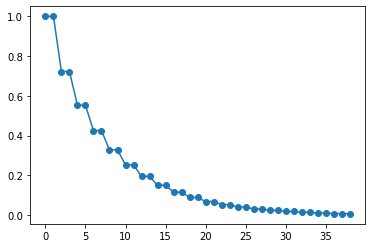

In [21]:
def ProbaDistribution(n):
    Power=np.linalg.matrix_power(M,n)
    return Power[1,:]

def ProbaNoEscape(n):
    Distribution=ProbaDistribution(n-1)
    return 1-Distribution[0, 5]-Distribution[0, 6] # returns 1-Proba(Exit 1)-Proba(Exit 2)

Proba=[ProbaNoEscape(n) for n in range(1, 40)]

plt.plot(Proba,'o-')
plt.show()


<div markdown=1 class="Answers"> 
**Question 2** 

2) The assumption tells us that
$$
p_n:=\mathbb{P}(L_n) = c \exp(-\alpha n+ n\varepsilon_n)
$$
where  $\varepsilon_n\to 0$ and $ n \to \infty$. Therefore
$$
\frac{\log(p_n)}{n}=\frac{\log(c)}{n}  -\frac{\alpha n}{n} + \varepsilon_n\to -\alpha.
$$
$$
\frac{\log(p_n)}{n}= -\alpha + \varepsilon_n\to -\alpha.
$$
According to the script below we have $\alpha \approx 0.13...$. 

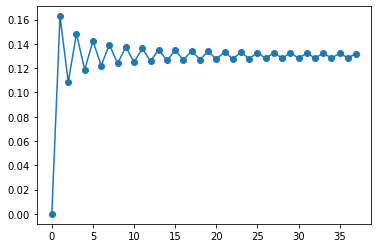

Last value =  0.13196150989642808


In [23]:
LogProba=[-np.log(Proba[k])/k for k in range(1,len(Proba))]
plt.plot(LogProba,'-o')
plt.show()
         
print('Last value = ',LogProba[-1])

<div markdown=1 class="DoIt"><br> 
Question 3). For $x\in \{A,B,C,D,E\}$ let $\pi_x^1$  be the probability that starting from $x$ the robot exits the labyrinth through Exit 1.
Use the method seen in class to write a system of equations for $\pi_A^1, ...,\pi_E^1$. Use `numpy` to solve the system and compare with your approximation obtained previously.<br>

<i>NB: If you want to solve with `numpy` the system 
$$
\begin{cases}
x+3y&=1\\
2x-y&=0
\end{cases}
$$
you can use `np.linalg.solve`:</i>
```
A=np.array([[1,3],[2,-1]])
B=np.array([1,0])
print(np.linalg.solve(A, B))
```

<div markdown=1 class="Answers"> 
According the method seen in class, we have that
$$
\begin{cases}
\pi_a&=\frac{1}{2}\pi_b+\frac{1}{2}\pi_d\\
\pi_b&=\frac{1}{3}\pi_a+\frac{1}{3}\pi_c+\frac{1}{3}\pi_e\\
\pi_c&=\frac{1}{2}\pi_b+\frac{1}{2}\\
\pi_d&=\frac{1}{2}\pi_a+\frac{1}{2}\pi_e\\
\pi_e&=\frac{1}{3}\pi_b+\frac{1}{3}\pi_d\\
\end{cases}
$$
And we can have the linear equation system that
$$
\begin{cases}
\pi_a - \frac{1}{2}\pi_b-\frac{1}{2}\pi_d&=0\\
\frac{1}{3}\pi_a-\pi_b+\frac{1}{3}\pi_c+\frac{1}{3}\pi_e&=0\\
\frac{1}{2}\pi_b-\pi_c&=-\frac{1}{2}\\
\frac{1}{2}\pi_a+-\pi_d+\frac{1}{2}\pi_e&=0\\
\frac{1}{3}\pi_b+\frac{1}{3}\pi_d-\pi_e&=0\\
\end{cases}
$$
Therefore we have the matrix $A$ and $b$ where
$$
A =
\begin{bmatrix}
1  & -\frac{1}{2}  & 0 &-\frac{1}{2}  & 0\\
\frac{1}{3}  &  -1&  \frac{1}{3}&  0& \frac{1}{3}\\
 0 & \frac{1}{2}  &  -1 & 0 & 0\\
  \frac{1}{2}& 0 & 0 &  -1& \frac{1}{2}\\
  0&  \frac{1}{3}&  0&  \frac{1}{3}&-1
\end{bmatrix}
$$

$$
b =
\begin{bmatrix}
 0\\
 0\\
 -\frac{1}{2} \\
 0\\
0
\end{bmatrix}
$$
We solve this system with the code below and obtain indeed
$$
\pi_b\approx 0.4666...
$$

In [28]:
A=np.array([[1,-1/2,0,-1/2,0],
            [-1/3,1,-1/3,0,-1/3],
            [0,-1/2,1,0,0],
            [-1/2,0,0,1,-1/2],
            [0,-1/3,0,-1/3,1]])

B=np.array([0,0,1/2,0,0])
print(np.linalg.solve(A, B))

[0.4        0.46666667 0.73333333 0.33333333 0.26666667]


<a id="Target"></a>
## Bonus: The target (taken from BX2022's Test)

A player plays the following game: 

* A target $T \in \{1,2,3,\dots \}$ is fixed.
* The player starts from $0$ and keeps throwing a fair dice (with six faces) until the cumulative sum is $\geq T$ and then stops.
* If the player ends right on $T$ then the player has won, otherwise (<i>i.e.</i> the player ends on $T+1$, $T+2$,...,  $T+5$) the player has lost. 

Here is an example with $T=12$:
$$
0 \stackrel{\text{dice = }3}{\longrightarrow} 3 \stackrel{\text{dice = }5}{\longrightarrow} 8\stackrel{\text{dice = }1}{\longrightarrow} 9\stackrel{\text{dice = }4}{\longrightarrow} 13\ \text{(Lost)}
$$

<div markdown=1 class="DoIt"> Write a function or a script in python which computes the winning probability $p_T$ when the target is $T$. Explain your strategy and justify that it is correct.<br><br>
<i>In order to check your code:
$$
p_1=0.166667\dots,\quad p_2=0.194444\dots,\quad p_9=0.280369\dots
$$</i>

<div markdown=1 class="Answers"> 

Let $X_1,X_2,\dots$ be the successives dice outcomes. They are independent uniform random variables in $\{1,2,\dots, 6\}$.

The successive cumulative sums are
$$
\mathrm{Cum}=\{X_1,X_1+X_2,X_1+X_2+X_3,\dots \}
$$
and we have
$$
p_T=\mathbb{P}(T\in \mathrm{Cum}).
$$
For $i\in \mathbb{N}$ denote by $p_T(i)$ the probability that the player wins the game starting from $i$.
We want to compute
$$
p_T=p_T(0).
$$
<br>
We first observe that 
\begin{align*}
p_T(T+1)&=p_T(T+2)=p_T(T+3)=p_T(T+4)=p_T(T+5)=0\\
p_T(T)&=1
\end{align*}
For $0\leq i<T$ we write
\begin{align*}
p_T(i)&=\mathbb{P}\left(\text{win starting from }i\right)\\
&=\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 1 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 2 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 3 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 4 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 5 \right)\\
&+\tfrac{1}{6}\mathbb{P}\left(\text{win starting from }i |\ \text{ first dice }= 6 \right)\\
&=\frac{1}{6}\left( p_T(i+1)+ p_T(i+2)+p_T(i+3)+p_T(i+4)+p_T(i+5)+p_T(i+6) \right).
\end{align*}
We deduce the code below.

In [57]:
def Prob_win(t, f):
    # here t means the target
    # here f means the faces of dice
    winning_prob_vector = np.zeros(t+f)
    winning_prob_vector[t] = 1
    for i in range(t, 0, -1):
        # 我们通过上面的算法进行代码实现
        winning_prob_vector[i-1] = np.mean(winning_prob_vector[i:i+f])
    return winning_prob_vector[0]
        
        
    
print('The value of P1 is ', Prob_win(1,6))
print('The value of P2 is ', Prob_win(2,6))
print('The value of P9 is ', Prob_win(9,6))

The value of P1 is  0.16666666666666666
The value of P2 is  0.19444444444444445
The value of P9 is  0.2803689454414977


<div markdown=1 class="DoIt"> For which target $1\leq T \leq 30$ is the game the most favourable?

The most favourable target T is  6
The most favourable target in 1 to 30 is  0.36023233882030176


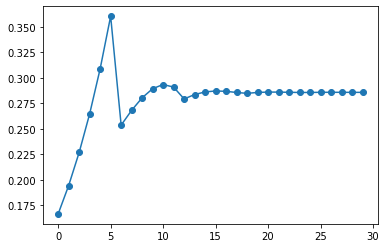

In [69]:
result = []

for i in range(1, 31):
    result.append(Prob_win(i, 6))
    
print('The most favourable target T is ', result.index(max(result))+1)
print('The most favourable target in 1 to 30 is ', max(result))
plt.plot(result,'o-')
plt.show()

<div markdown=1 class="Answers"> 

According to the above plot the game is the most favourable for $T=6$.
<br><br>
<i>(In passing we observe that $(p_T)_T$ seems to converge. Indeed it can be proved using Markov chains that
$$
\lim_T p_T=\frac{1}{7/2}=0.2857...
$$
The intuition is that the average dice outcome is $7/2$ so that a large $T$ has approximately a probability $\frac{1}{7/2}$ of belonging to $\mathrm{Cum}$.)</i>
